In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import cv2
import matplotlib.pyplot as plt
import random

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname, "contains", len(filenames), "files.")
    #for filename in filenames:
    #    print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input contains 0 files.
/kaggle/input/p7-egl-ml-igl contains 0 files.
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate contains 1350 files.
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate contains 1350 files.
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate contains 1350 files.


### Check EGL images

In [2]:
# Get filenames for EGL
egl_dirname = '/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate'
egl_filenames = os.listdir(dirname)
# print(egl_filenames)

Image shape (300, 300)


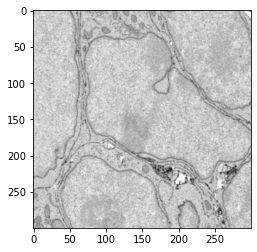

In [3]:
# Check image info
img = cv2.imread(egl_dirname+'/'+egl_filenames[0], 0)
print('Image shape', img.shape)
ax = plt.imshow(img, cmap=plt.get_cmap("gray"))

## Convolutional filters + Random Forest for image classification

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import glob 
import cv2


from keras.models import Model,Sequential
from keras.layers import Dense, Flatten , Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import os 
import seaborn as sns





In [7]:
SIZE = 300
images = []
labels = []

for directory_path in glob.glob('/kaggle/input/p7-egl-ml-igl/*'):
    label = directory_path.split("\\")[-1]
    print(label)
    
    for img_path in glob.glob(os.path.join(directory_path,"*.png")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        images.append(img)
        labels.append(label)



/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R24_(19316,49312,936)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R41_(35908,45696,1065)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R37_(27404,48664,1056)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R60_(19472,31720,1696)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R57_(25788,32968,1387)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R18_(26528,31476,536).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R82_(24960,40140,2502)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R11_(12580,49760,217)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R3_(13932,44320,0)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R80_(31648,41468,2277)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R26_(20896,43820,936)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_s

/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R41_(36208,45396,1065)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R22_(34192,42524,536)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R7_(31276,47232,217)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R88_(21492,31968,2502).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R77_(40324,34160,2277)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R54_(19020,42096,1366)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R47_(21648,33100,1101)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R36_(32764,48272,1056).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R50_(14896,42444,1101).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R10_(14100,46040,217)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R61_(21360,32924,1696).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R71_(28352,30908,1936).png
/kaggle/input/p7-egl-ml-ig

/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R1_(20588,40032,0).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R17_(27088,38340,536).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R29_(10740,38328,936)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R79_(26128,41076,2277)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R85_(29260,44000,2502).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R74_(37748,26120,1995).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R74_(38048,26120,1995)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R51_(13040,47492,1101)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R60_(19472,32020,1696).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R42_(37284,39680,1065)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R54_(19020,42096,1366).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R86_(37588,36704,2502)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_ti

/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R38_(24476,46376,1056)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R45_(29448,32536,1076).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R49_(12016,33376,1101)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R73_(20616,29724,1995)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R21_(33740,34264,536).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R30_(11344,35620,936)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R57_(25488,32668,1387).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R3_(13632,44320,0)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R68_(40388,32112,1870)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R35_(34240,47356,1056)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R73_(20916,29424,1995)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R87_(34208,35380,2502)_rot90.png
/kaggle/input/p7

/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R90_(39380,29568,2502)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R63_(23772,45312,1696)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R12_(15672,49100,536)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R34_(31372,40032,1056)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R30_(11344,36220,936).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R44_(35460,34400,1076)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R22_(34192,42524,536)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R19_(19328,32004,536).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R72_(26416,29692,1995)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R7_(31276,47232,217)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R29_(11340,38328,936)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R30_(11344,36220,936)_rot45.png
/kaggle/inpu

/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R81_(28480,41172,2384)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R48_(12936,34296,1101)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R15_(15096,43892,536).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R30_(11344,35620,936)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R9_(17408,47100,217)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R81_(28480,41472,2384)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R15_(15096,43592,536).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R65_(32592,41328,1831).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R55_(15540,36992,1366).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R88_(22092,31968,2502)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R61_(21360,33524,1696)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R56_(21408,37148,1387)_rot90.png
/kaggle/input/p7-egl-

/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R20_(35008,29588,536)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R87_(34208,35380,2502)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R74_(38048,26120,1995).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R40_(25456,47168,1065)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R50_(15196,42144,1101)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R68_(40988,32112,1870)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R55_(16140,36992,1366).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R66_(37312,37636,1831).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R21_(34340,34264,536)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R22_(34192,42224,536)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R64_(23604,46432,1831).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R74_(38348,26120,1995).png
/kaggle/input/p7-egl-ml-i

/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R34_(31372,40032,1056)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R2_(12992,38964,0)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R88_(21792,31968,2502).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R60_(19472,31720,1696)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R82_(24960,40140,2502).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R9_(17108,47400,217)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R5_(32416,42964,0)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R68_(40688,32412,1870).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R85_(28960,44000,2502).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R38_(24476,46376,1056)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R80_(31348,41168,2277)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R68_(40688,31812,1870)_rot90.png
/kaggle/input/p7-egl-ml-ig

/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R31_(11976,42524,936)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R52_(20892,46720,1101).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R76_(39296,30316,2277)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R42_(37884,39680,1065).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R24_(19616,49612,936).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R15_(15096,43592,536)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R20_(34708,29288,536)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R28_(15160,34844,936)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R82_(24960,39540,2502).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R4_(20052,44960,0).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R6_(34016,41588,0).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R34_(31672,39732,1056)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shi

/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R73_(20616,29424,1995).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R24_(19916,49312,936)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R73_(20916,29424,1995)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R87_(33908,35680,2502)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R39_(23056,49032,1056)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R30_(11344,35920,936)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R63_(23472,45612,1696).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R21_(34040,34564,536)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R56_(21408,37748,1387)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R11_(12280,49460,217)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R49_(12016,33676,1101)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R62_(24192,34656,1696)_rot90.png
/kaggle/

/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R56_(21408,37148,1387)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R70_(33712,32752,1892).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R43_(37532,36808,1065)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R38_(24176,46076,1056).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R47_(21348,32800,1101).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R55_(15840,36692,1366).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R63_(23472,45012,1696)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R10_(13800,46340,217)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R38_(24476,46376,1056).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R49_(12016,33976,1101)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R11_(12280,49460,217).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R48_(12936,34596,1101).png
/kaggle/input/p7-egl-ml-igl/IGL_tile

/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R7_(30976,46932,217).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R77_(40624,34460,2277).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R36_(33064,48272,1056).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R8_(22780,44408,217)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R13_(17472,48236,536)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R19_(19628,32304,536)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R31_(12276,42224,936)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R11_(11980,49760,217).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R30_(11344,35620,936).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R11_(12280,49460,217)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R32_(13984,44244,936).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R78_(36256,38988,2277)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_s

/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R64_(24204,46432,1831).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R64_(23904,46132,1831).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R1_(19988,40032,0)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R26_(20596,43520,936)_rot90.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R48_(12936,34596,1101)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R24_(19916,49312,936).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R39_(23356,49032,1056).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R27_(22256,32944,936).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R1_(20288,39732,0).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R62_(24192,34956,1696).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R47_(21648,32500,1101).png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R22_(34192,41924,536)_rot45.png
/kaggle/input/p7-egl-ml-igl/IGL_tiles_shift_rotate/R

/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R44_(32380,22036,1248)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R50_(42216,19640,1736)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R72_(19472,18588,2176)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R85_(32016,20116,2510).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R24_(29224,23048,712)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R30_(27512,22880,816)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R30_(27512,22880,816).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R40_(23300,25188,1248)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R74_(33904,18860,2464)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R23_(32984,25804,512)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R38_(13460,24040,848)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R79_(37008,22652,2480).png
/kaggle/input/p7-egl-ml-igl

/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R66_(38300,22736,2176)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R4_(35448,23036,0).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R72_(19472,19188,2176).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R27_(11808,24208,712)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R54_(31764,22344,1736)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R70_(21868,20848,2176)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R9_(12888,23340,168)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R69_(28112,19636,2176).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R9_(13188,23040,168).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R51_(40468,21892,1736)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R34_(27728,26008,848)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R84_(35876,17792,2510)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_s

/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R61_(22768,22616,2160)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R86_(17424,21984,2510).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R62_(23528,22036,2176)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R53_(37860,23144,1736)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R74_(33904,18260,2464)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R2_(23892,25488,0)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R15_(28200,23400,224).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R35_(27800,22700,848).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R63_(18604,21712,2176)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R69_(28112,19336,2176)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R74_(33904,18260,2464).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R55_(20076,22488,1736)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_til

/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R52_(38430,24192,1736)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R25_(26772,23320,712)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R73_(32084,20284,2464)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R57_(38320,19656,2144)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R72_(19172,18888,2176)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R87_(16728,24524,2510)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R65_(31744,19180,2176).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R76_(36896,20036,2464)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R56_(18700,23760,1736)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R16_(25876,23592,224).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R85_(31716,19816,2510)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R76_(37196,20036,2464)_rot90.png
/kaggle/input/p7-e

/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R6_(21584,28540,168)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R29_(28936,23796,816)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R64_(26784,21156,2176).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R31_(28572,23816,816)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R10_(21164,26232,209)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R84_(36176,18092,2510)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R73_(32084,20284,2464)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R30_(28112,22880,816)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R70_(21868,20848,2176).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R81_(41932,22208,2510)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R28_(35548,24048,712).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R49_(45252,18564,1736)_rot45.png
/kaggle/input/p7-egl-ml-igl/M

/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R34_(27728,26608,848).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R51_(40768,21592,1736)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R75_(36248,17436,2464)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R24_(29224,23048,712).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R65_(31744,18880,2176).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R41_(18644,23412,1248)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R1_(27120,24064,0).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R8_(36588,25848,168)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R52_(38730,24192,1736)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R81_(41332,22208,2510)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R51_(40468,21892,1736)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R41_(18644,23412,1248).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift

/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R88_(17196,23652,2510).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R48_(44852,18392,1736).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R90_(31612,19808,2511)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R34_(28028,26308,848)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R74_(33904,18860,2464).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R2_(24192,25188,0)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R86_(17424,22584,2510).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R54_(31164,22344,1736)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R62_(23528,22036,2176).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R61_(23068,22616,2160).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R12_(13840,25136,209)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R8_(36288,26148,168)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotat

/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R47_(38640,20092,1736)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R35_(27800,22700,848)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R11_(16284,25216,209)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R21_(26048,25044,512).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R26_(22680,26672,712)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R37_(23784,22300,848)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R61_(22768,22916,2160).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R64_(26784,21456,2176)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R78_(33616,22080,2464)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R7_(28156,26088,168).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R81_(41632,22208,2510)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R54_(31464,22344,1736)_rot45.png
/kaggle/input/p7-egl-ml-igl/M

/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R19_(31420,22800,512)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R65_(31744,19180,2176)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R57_(38320,19656,2144).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R5_(18612,24576,0)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R32_(33792,23968,816)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R62_(23528,21436,2176).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R68_(33064,18188,2176)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R30_(27512,22880,816)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R38_(12860,24040,848)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R49_(44952,18264,1736)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R73_(32084,19684,2464)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R48_(44852,17792,1736)_rot45.png
/kaggle/input/p7-egl-ml-

/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R3_(31840,24588,0).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R12_(13840,25136,209).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R1_(27120,24064,0)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R38_(13160,24340,848)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R82_(37200,19332,2510).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R89_(43188,16800,2510)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R25_(26472,23620,712).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R28_(35548,24048,712)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R10_(21464,25932,209)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R48_(44552,18092,1736).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R82_(36900,19632,2510)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R73_(31784,19984,2464)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rota

/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R32_(34092,23968,816).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R83_(38368,18740,2510)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R74_(33904,18260,2464)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R49_(44952,18264,1736)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R1_(26820,24064,0)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R51_(40768,21892,1736)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R32_(34392,23968,816).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R30_(27812,22580,816)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R83_(38368,18140,2510)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R28_(34948,24048,712)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R76_(37196,19736,2464).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R37_(24084,22300,848)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_

/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R32_(33792,23968,816).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R18_(14360,27012,224)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R25_(26472,23320,712)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R23_(33584,25804,512)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R52_(38730,24192,1736).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R19_(31720,23100,512).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R35_(28100,23000,848)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R71_(19016,21720,2176).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R52_(38730,24492,1736).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R49_(44952,18864,1736)_rot90.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R32_(34092,23668,816).png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotate/R20_(30676,22528,512)_rot45.png
/kaggle/input/p7-egl-ml-igl/ML_tiles_shift_rotat

/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R88_(32548,11136,2502)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R5_(21684,14832,0).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R3_(35436,13120,0)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R87_(39664,11936,2502)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R64_(41388,11712,1820).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R43_(33088,13412,1152)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R49_(30976,10076,1317)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R57_(39744,11796,1547).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R73_(27648,9396,2334)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R12_(27364,12640,181)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R24_(25580,13936,689)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R78_(33152,11348,2334).png
/kaggle/input/p7-egl-ml-igl

/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R52_(22240,12652,1547).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R2_(25148,12688,0)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R83_(23404,12176,2502)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R77_(29140,11584,2334).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R81_(18420,12944,2502)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R31_(26548,10752,803)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R11_(33392,15060,38)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R84_(30540,11424,2502)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R9_(27020,16368,38)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R69_(30720,11564,2020).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R11_(33392,15360,38)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R13_(22868,15152,181)_rot45.png
/kaggle/input/p7-egl-ml

/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R81_(18720,12644,2502)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R34_(32724,11504,803)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R59_(21676,10432,1820)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R36_(31180,12800,1010)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R58_(26260,9728,1820).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R34_(33324,11504,803).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R31_(26848,10752,803)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R75_(41036,10368,2334)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R43_(33088,13712,1152)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R84_(30240,11124,2502)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R32_(15280,17104,803)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R2_(25148,12688,0).png
/kaggle/input/p7-eg

/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R62_(35136,13760,1820)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R42_(36068,13840,1152)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R80_(18804,8448,2502).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R10_(30400,12924,38).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R14_(15008,16112,181)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R56_(38560,9620,1547)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R69_(30720,10964,2020).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R9_(26720,16068,38)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R60_(22080,12992,1820)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R16_(14128,11460,181)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R4_(29180,15280,0).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R56_(38560,9620,1547).png
/kaggle/input/p7-egl-ml-igl/EGL_tile

/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R8_(11296,13660,38).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R83_(23404,12176,2502).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R90_(25264,14572,2511).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R59_(21676,10432,1820)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R76_(38848,12628,2334).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R69_(30720,11264,2020)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R61_(32468,10688,1820)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R39_(23404,14928,1152).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R74_(33236,11360,2334)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R7_(17820,15472,38).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R45_(18016,12192,1317).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R61_(33068,10688,1820)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_sh

/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R39_(23104,14628,1152)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R49_(30976,9776,1317).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R71_(40428,11648,2020).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R80_(19104,8448,2502)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R67_(28672,9792,2020).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R24_(25280,13636,689)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R37_(18800,12272,1152)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R30_(26000,14208,803).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R24_(25580,13936,689).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R14_(15008,16412,181)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R15_(13936,17668,181).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R74_(33536,11360,2334)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tile

/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R59_(21076,10432,1820)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R11_(33392,15660,38)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R46_(18048,14912,1317)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R28_(11936,15092,689)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R69_(30420,11264,2020)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R14_(15008,16112,181)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R20_(20140,14432,525).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R25_(33012,12416,689).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R43_(33388,13712,1152).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R19_(28292,13888,181)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R23_(33076,15616,525)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R54_(27840,12608,1547)_rot90.png
/kaggle/input/p7-e

/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R49_(30976,9476,1317)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R32_(15280,17404,803)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R48_(22948,13360,1317).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R18_(33888,15168,181)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R66_(23552,12116,2020)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R19_(28892,13888,181)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R84_(30240,11724,2502)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R31_(26848,11052,803)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R42_(36368,13840,1152)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R56_(38560,9920,1547)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R43_(33088,13412,1152)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R15_(13936,18268,181).png
/kaggle/inp

/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R75_(40436,10368,2334)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R90_(24964,14272,2511).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R67_(28672,9792,2020)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R36_(30880,12800,1010)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R12_(27964,12640,181).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R72_(20960,9972,2334)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R88_(33148,11136,2502)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R23_(33376,15916,525)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R6_(11852,16720,0).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R8_(11596,13360,38).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R4_(28880,15280,0)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R68_(33280,8896,2020)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_

/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R43_(33088,13712,1152).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R85_(32176,9548,2502).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R20_(19840,14732,525).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R90_(25264,13972,2511)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R52_(21940,12352,1547)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R6_(11252,16720,0)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R80_(19404,8448,2502)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R88_(32848,11136,2502)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R60_(22080,13292,1820)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R38_(16908,16272,1152).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R53_(21440,15372,1547).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R7_(17520,15772,38)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_

/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R40_(27020,12480,1152)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R29_(21900,13184,689)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R21_(12028,14560,525)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R33_(32912,16000,803)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R87_(39664,11636,2502)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R73_(27648,9696,2334).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R88_(33148,11136,2502).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R39_(23104,15228,1152).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R65_(20800,9472,2020)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R61_(32768,10988,1820).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R23_(33376,15616,525).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R19_(28292,13888,181)_rot45.png
/kaggle/input/p7-egl-ml-igl/E

/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R9_(26420,16368,38).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R54_(28140,12608,1547)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R20_(19840,14132,525)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R40_(26420,12480,1152)_rot45.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R7_(17520,15172,38).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R64_(41088,11412,1820).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R83_(22804,12176,2502)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R60_(22080,13292,1820).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R35_(31600,11104,1010).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R41_(31196,11776,1152)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R55_(32244,12288,1547).png
/kaggle/input/p7-egl-ml-igl/EGL_tiles_shift_rotate/R26_(23536,16628,689)_rot90.png
/kaggle/input/p7-egl-ml-igl/EGL_tile

In [8]:
images = np.array(images)
labels = np.array(labels)


In [12]:
# Encode the label from text to integers 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(labels)
labels = le.transform(labels)



(4050,)

In [13]:
# train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images,labels, test_size=0.3, random_state=42)


In [14]:
# Normlize the pixel value to between 0 and 1 
X_train, X_test = X_train/255.0,X_test/255.0
X_train

In [15]:
# One hot encode y values for neural network 
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [8]:
activation = 'sigmoid'

feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (SIZE, SIZE, 3)))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Flatten())

In [9]:
#Add layers for deep learning prediction
x = feature_extractor.output  
x = Dense(128, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(4, activation = 'softmax')(x)

In [10]:
# Make a new model combining both feature extractor and x
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary()) 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 300, 300, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 300, 300, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 300, 300, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 64)      18496 

In [ ]:
#Train the CNN model
history = cnn_model.fit(X_train, y_train_one_hot, epochs=30, validation_data = (X_test, y_test_one_hot))

